In [103]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [104]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [105]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing values

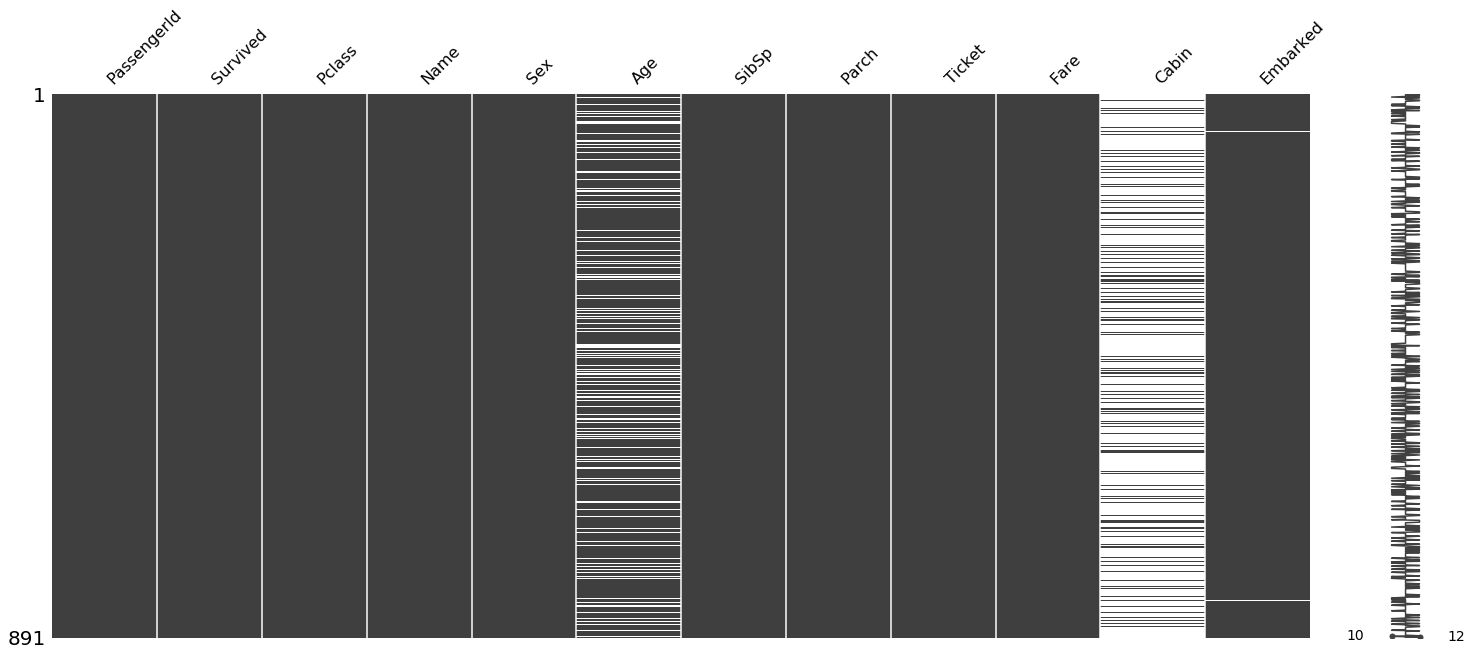

In [106]:
missingno.matrix(train)

In [107]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
train.Age.fillna(value = train.Age.median(),
                inplace = True)
train.Embarked.fillna(value = 'S',
                inplace = True)

### Target feature: Survived

In [109]:
survivors_perc = round(train.Survived.value_counts(normalize = True)*100)
print(f'Survived {survivors_perc[1]} % of passengers')

Survived 38.0 % of passengers


### Feature: Pclass

In [110]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [111]:
sur_class = train.groupby('Pclass')['Survived'].sum()
sur_class

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Text(0, 0.5, 'Survived passangers')

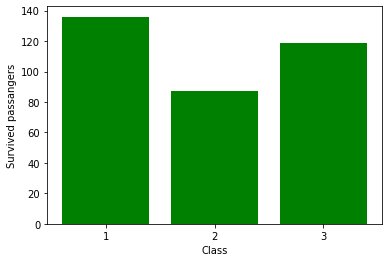

In [112]:
plt.bar(['1', '2', '3'], sur_class, color = 'g')
plt.xlabel('Class')
plt.ylabel('Survived passangers')

In [113]:
pclass_surr = train[['Pclass', 'Survived']]

In [114]:
pclass_surr.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [115]:
grouped_n_pclass = pclass_surr.groupby(['Pclass'])['Survived'].value_counts(normalize=True)

In [116]:
gnp_for_graph = (grouped_n_pclass * 100).round()
gnp_for_graph

Pclass  Survived
1       1           63.0
        0           37.0
2       0           53.0
        1           47.0
3       0           76.0
        1           24.0
Name: Survived, dtype: float64

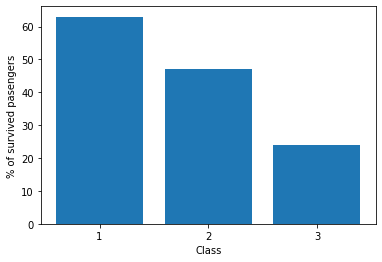

In [117]:
plt.bar([1, 2, 3], gnp_for_graph[:,1])
plt.xticks([1, 2, 3])
plt.xlabel('Class')
plt.ylabel('% of survived pasengers')
plt.show()

In [118]:
fdf = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [180]:
d_Pclass = pd.get_dummies(fdf.Pclass
              , prefix = 'Pclass ')

AttributeError: 'DataFrame' object has no attribute 'Pclass'

In [120]:
fdf = fdf.join(d_Pclass)

In [121]:
fdf = fdf.drop('Pclass', axis=1)

In [122]:
fdf.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass _1,Pclass _2,Pclass _3
0,0,male,22.0,1,0,7.2500,S,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0
2,1,female,26.0,0,0,7.9250,S,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0
4,0,male,35.0,0,0,8.0500,S,0,0,1


### Feature: sex

In [123]:
train.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [124]:
sur_sex = train.groupby('Sex')['Survived'].value_counts()
sur_sex_n = (train.groupby('Sex')['Survived'].value_counts(normalize=True)*100).round()

In [125]:
sur_sex_n[:, 1]

Sex
female    74.0
male      19.0
Name: Survived, dtype: float64

In [126]:
sur_sex_total = train.groupby('Survived')['Sex'].value_counts()

In [127]:
sur_sex_total[1]

Sex
female    233
male      109
Name: Sex, dtype: int64

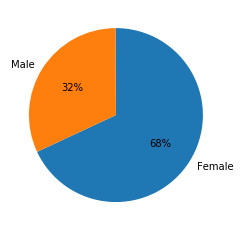

In [128]:
plt.pie(sur_sex_total[1],
       labels = ['Female', 'Male'], 
       startangle = 205,
       autopct = '%1.0f%%')

plt.show()

In [129]:
d_sex = pd.get_dummies(fdf.Sex)

In [130]:
d_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [131]:
fdf = fdf.join(d_sex)

In [134]:
fdf = fdf.drop('Sex', axis = 1)

In [136]:
d_emb = pd.get_dummies(fdf.Embarked
                      , prefix = 'Emb')

In [138]:
fdf = fdf.join(d_emb)

In [140]:
fdf = fdf.drop('Embarked', axis = 1)

In [141]:
fdf

,Survived,Age,SibSp,Parch,Fare,Pclass _1,Pclass _2,Pclass _3,female,male,Emb_C,Emb_Q,Emb_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,28.0,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [143]:
X_train = fdf.drop('Survived', axis = 1)

In [149]:
y_train = fdf.Survived

In [157]:
print(X_train.shape, y_train.shape)

(891, 12) (891,)


In [163]:
logistic = LogisticRegression(solver = 'lbfgs', max_iter = 1500)

In [164]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Test data preparation

In [166]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


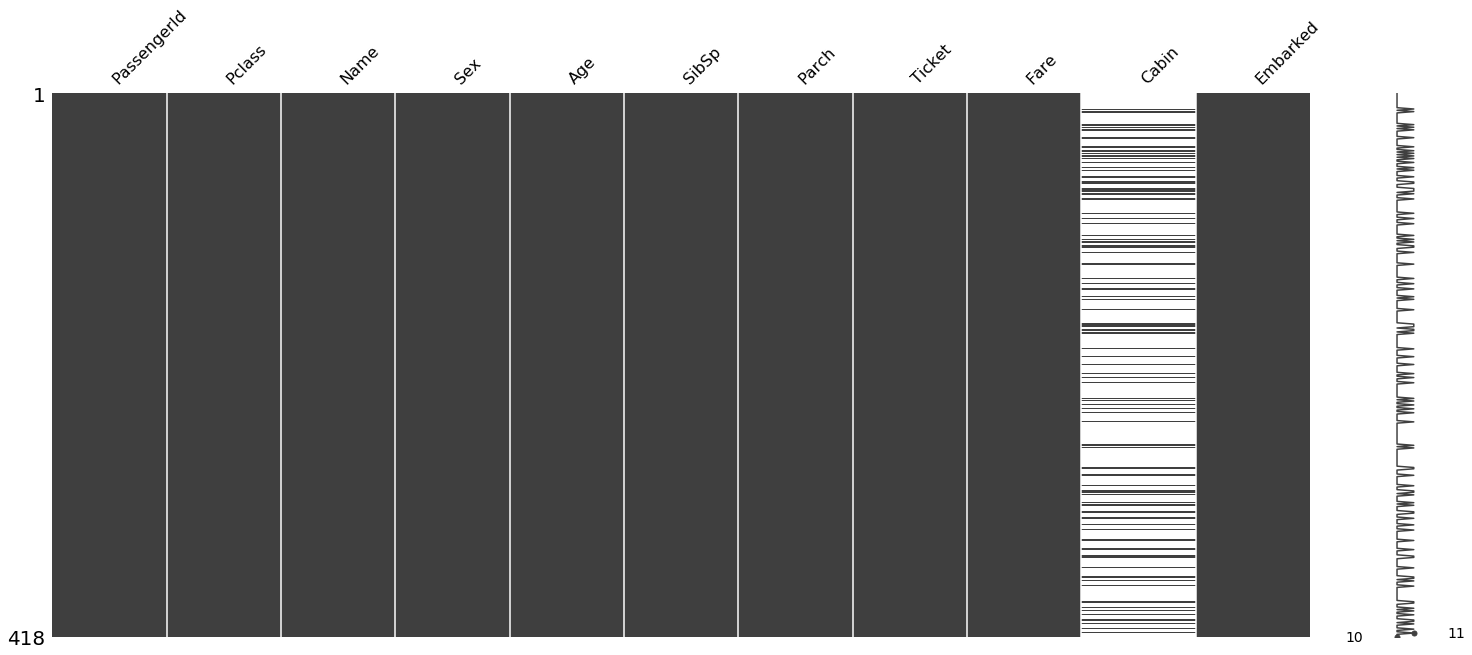

In [173]:
missingno.matrix(test)

In [170]:
test.Age.fillna(value = test.Age.median(),
                inplace = True)

In [172]:
test.Fare.fillna(value = test.Fare.median(),
                inplace = True)

In [174]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [188]:
td_Pclass = pd.get_dummies(test.Pclass
              , prefix = 'Pclass ')

In [189]:
td_Pclass

,Pclass _1,Pclass _2,Pclass _3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [181]:
tdf = test.drop('Pclass', axis = 1)

In [183]:
tdf = tdf.drop('Name', axis = 1)

In [185]:
tdf = tdf[['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']]

In [190]:
tdf = tdf.join(td_Pclass)

In [193]:
td_emb = pd.get_dummies(test.Embarked,
              prefix = 'Emb')

In [194]:
tdf = tdf.join(td_emb)

,PassengerId,Age,SibSp,Parch,Fare,Pclass _1,Pclass _2,Pclass _3,Emb_C,Emb_Q,Emb_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,0,0,8.0500,0,0,1,0,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0,0
415,1307,38.5,0,0,7.2500,0,0,1,0,0,1
416,1308,27.0,0,0,8.0500,0,0,1,0,0,1


In [197]:
td_sex = pd.get_dummies(test.Sex)

In [198]:
tdf = tdf.join(td_sex)

In [199]:
tdf

,PassengerId,Age,SibSp,Parch,Fare,Pclass _1,Pclass _2,Pclass _3,Emb_C,Emb_Q,Emb_S,female,male
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,0,1,1,0
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,0,1
3,895,27.0,0,0,8.6625,0,0,1,0,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,0,0,8.0500,0,0,1,0,0,1,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0,0,1,0
415,1307,38.5,0,0,7.2500,0,0,1,0,0,1,0,1
416,1308,27.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [204]:
X_test = tdf.drop('PassengerId', axis = 1)

In [205]:
predictions = logistic.predict(X_test)

In [206]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [208]:
submission = pd.DataFrame()


In [212]:
submission['PassengerId'] = test.PassengerId
submission['Survived'] = predictions

In [213]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [215]:
submission.to_csv('submission.csv', index=False)